# Курсовой проект для курса "Python для Data Science"

## Импорт данных

Импортируем библиотеки

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

OUTPUT_FILENAME = "AABelov_predictions.csv"

Импортируем тренировочные и тестовые данные

In [88]:
trd = pd.read_csv("train.csv")
tsd = pd.read_csv("test.csv")

## Просмотр и анализ данных

Просматриваем первые 20 наблюдений. Наблюдаем:
- Пропуски в признаке LifeSqure
- LifeSquare бывает больше Square
- Floor бывает больше HouseFloor
- KitchenSquare бывает больше Square
- Часто повторяющийся год 1977
- Признаки Shops_2, Ecology_2, Ecology_3 можно привести к бинарным
- Часто повторяющийся признак Healthcare_1 равный 900.0

In [89]:
trd.head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


Строим матрицу корреляций датасета и тепловую диаграмму к ней. Наблюдаем:
- Social_1 практически линейно зависит от Social_2
- Shops_1 коррелирует с Social_3
- Rooms коррелирует со Square

In [90]:
trd.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


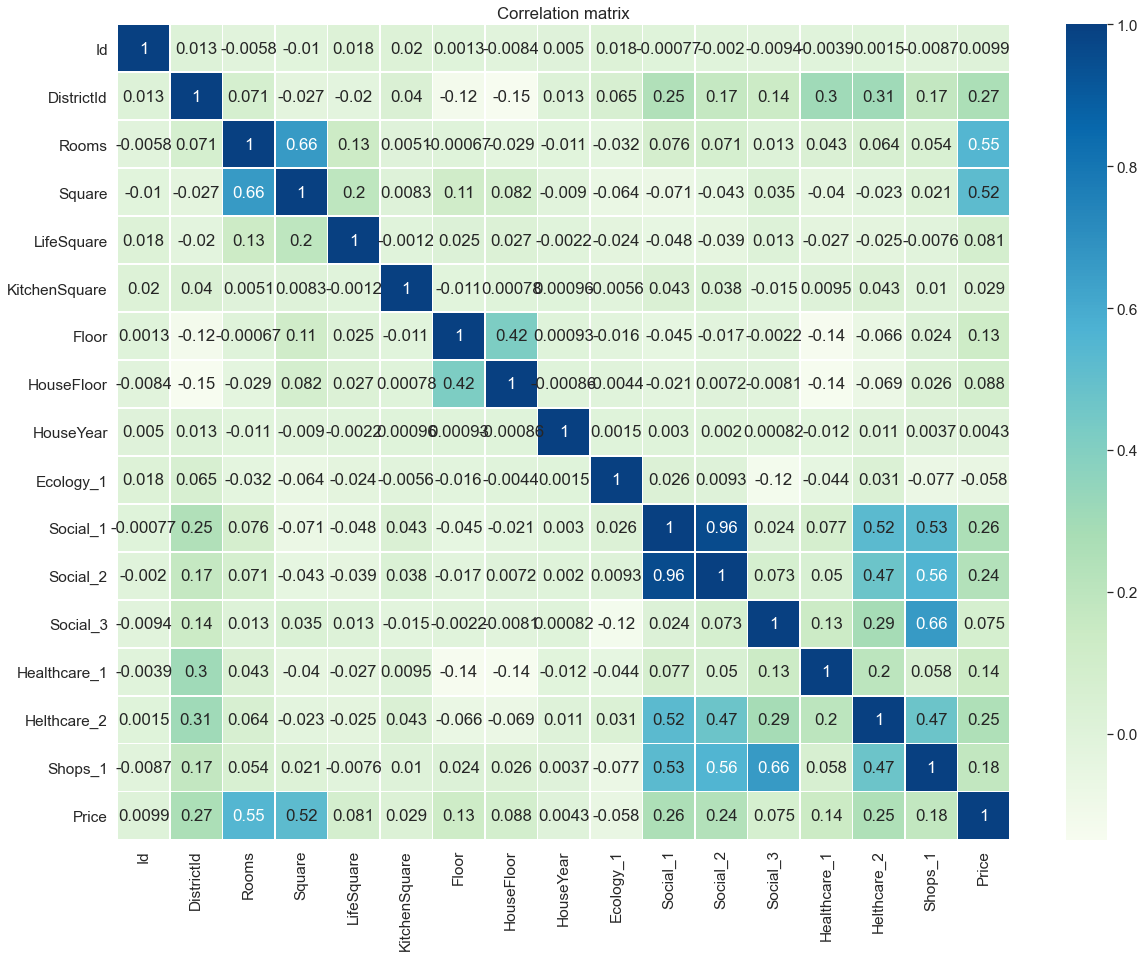

In [91]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(trd.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Корректировка данных

Смотрим наличие нулевых значений в данных. Наблюдаем:
- признак Healthcare_1 практически наполовину пуст
- пропущена треть значений LifeSquare

In [92]:
trd.isna().sum(axis=0)

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Заменяем нулевые значения признака Healthcare_1 и LifeSquare значением медианы. Для этого пишем функцию.

In [93]:
def cleanup_nans(dataset):
    field_names_to_cleanup = ["Healthcare_1", "LifeSquare"]
    for field_name in field_names_to_cleanup:
        dataset.loc[dataset[field_name].isnull(), field_name] = dataset[field_name].median()
    return dataset

In [94]:
trd = cleanup_nans(trd)

Проверяем полученный результат (видим, что пропуски устранены)

In [95]:
trd.isna().sum(axis=0)

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

Создаем исправляем некоторые упомянутые выше отклонения по итогам наблюдения

In [111]:
def reorganize_dataframe(df):
    newdf = df
    newdf = newdf.replace({ "A": 1, "B": 0 })
    newdf.loc[newdf['KitchenSquare'] > newdf['Square'], "KitchenSquare"] = newdf["Square"] - newdf["LifeSquare"]
    newdf.loc[newdf["Square"] < newdf["LifeSquare"], "LifeSquare"] = newdf["Square"] - newdf["KitchenSquare"]
    newdf.loc[newdf["Floor"] > newdf["HouseFloor"], "HouseFloor"] = newdf["Floor"]
    newdf.loc[newdf["HouseYear"] > 2021, "HouseYear"] = 2021
    return newdf

In [112]:
result_trd = reorganize_dataframe(trd)
y = result_trd["Price"]
result_trd.drop(columns=["Price", "Id"], inplace=True)
X = result_trd

## Обучение модели

Импортируем библиотеки

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Построим модель регрессии методом случайного леса. Для этого подберем оптимальный коэффициент глубины.

In [100]:
r2_train = []
r2_test = []
for i in range(2, 20):
    rf_model = RandomForestRegressor(max_depth=i)
    rf_model.fit(X_train, y_train)
    pred_train = rf_model.predict(X_train)
    pred_test = rf_model.predict(X_test)
    r2_train.append(r2(y_train, pred_train))
    r2_test.append(r2(y_test, pred_test))

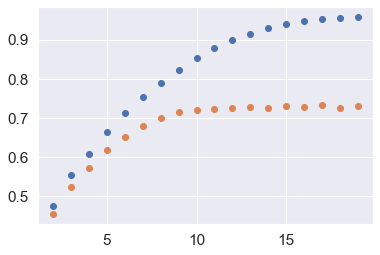

In [101]:
plt.scatter(list(range(2, 20)), r2_train)
plt.scatter(list(range(2, 20)), r2_test)

Наблюдаем, что примерно до максимальной глубины равной 15 метрика растет. Останавливаемся на модели с максимальной глубиной 12

In [102]:
rf_model = RandomForestRegressor(max_depth=15)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

Пробуем предсказать значение целевой переменной для тестовых данных, для этого реорганизуем данные

In [103]:
result_tsd = reorganize_dataframe(tsd)

Устраняем пустые значения

In [104]:
result_tsd = cleanup_nans(result_tsd)

Предсказываем данные

In [107]:
pred_real = rf_model.predict(result_tsd.drop(["Id"], axis = "columns"))

Рассчитываем итоговую метрику R2. Получилось значение 0.72, что больше 0.6, 
значит работа выполнена с достаточной точностью, можно выводить результаты в файл.

In [108]:
r2(y_test, pred_test)

0.7321379652441152

Выгружаем итоговый датафрейм

In [109]:
tsd["Price"] = pred_real

In [110]:
tsd[["Id", "Price"]].to_csv(OUTPUT_FILENAME)